### instructions for task 1

Task 1: Generate a time series plot of the monthly totals of international airline passengers. Based
on the time series plot, answer the following questions:

• Is the time series stationary?

• Are there any notable trends?

• Are there any cyclical behaviors?

• Is there any heteroscedasticity?

In [54]:
df=pd.read_csv("/Users/lihong/Desktop/ATS_proj1/AirPassengers.csv")
rows,cols = df.shape 
print(f"The dataset has {rows} rows and {cols} columns.")

The dataset has 144 rows and 2 columns.


Raw plot 

In [104]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

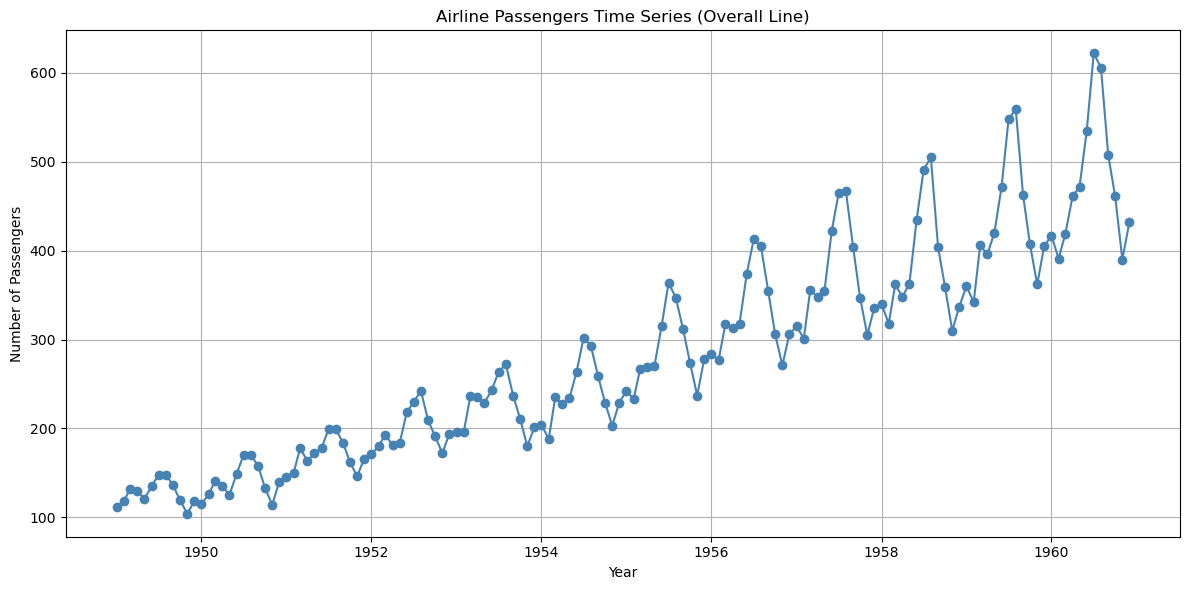

Saved figure to /Users/lihong/Desktop/ATS_proj1/result_images/airpassengers_overall_line.png


In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 设置输出文件夹
save_dir = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(save_dir, exist_ok=True)

# 读取数据
data = pd.read_csv("AirPassengers.csv")

# ==== 把小数年份转换成年月 ====
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

data["Date"] = data["Time"].apply(year_fraction_to_datetime)

# ==== 整体折线图 ====
plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["AirPassengers"], marker="o", color="steelblue", linewidth=1.5)

plt.title("Airline Passengers Time Series (Overall Line)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)

# 保存图像
save_path = os.path.join(save_dir, "airpassengers_overall_line.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved figure to {save_path}")


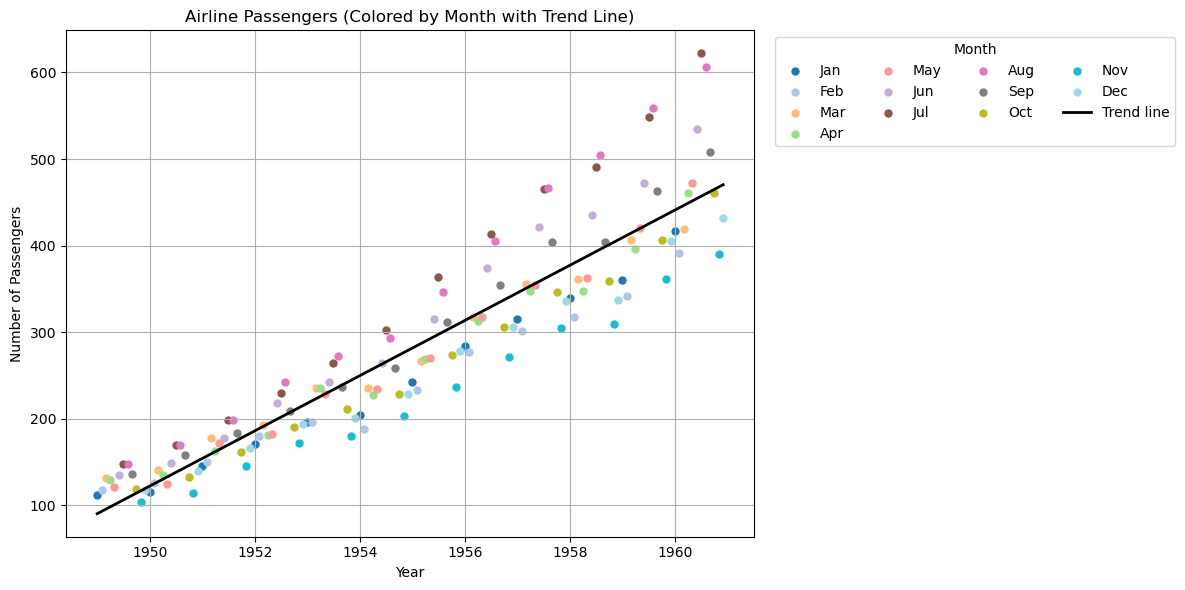

Saved figure to /Users/lihong/Desktop/ATS_proj1/result_images/airpassengers_colored_trend.png


In [125]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# set the output folder
save_dir = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(save_dir, exist_ok=True)

# read data 
data = pd.read_csv("AirPassengers.csv")

# ==== 把小数年份转换成年月 ====
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

data["Date"] = data["Time"].apply(year_fraction_to_datetime)
data["Month"] = data["Date"].dt.month

# ==== 为每个月指定颜色 ====
colors = plt.cm.tab20(np.linspace(0, 1, 12))
month_names = list(calendar.month_abbr)[1:]

# ==== 绘制散点（不同月份不同颜色） ====
plt.figure(figsize=(12,6))
for m in range(1, 13):
    subset = data[data["Month"] == m]
    plt.scatter(subset["Date"], subset["AirPassengers"], 
                color=colors[m-1], label=month_names[m-1], s=25)

# ==== 添加线性趋势线 ====
# 用日期转换为 ordinal 数字做回归
x = data["Date"].map(pd.Timestamp.toordinal).values
y = data["AirPassengers"].values
coef = np.polyfit(x, y, deg=1)   # 一次多项式
trend = np.poly1d(coef)
plt.plot(data["Date"], trend(x), color="black", linewidth=2, label="Trend line")

plt.title("Airline Passengers (Colored by Month with Trend Line)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.legend(title="Month", ncol=4, bbox_to_anchor=(1.02, 1.0), loc="upper left")

# save figure
save_path = os.path.join(save_dir, "airpassengers_colored_trend.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved figure to {save_path}")


## monthly plot 

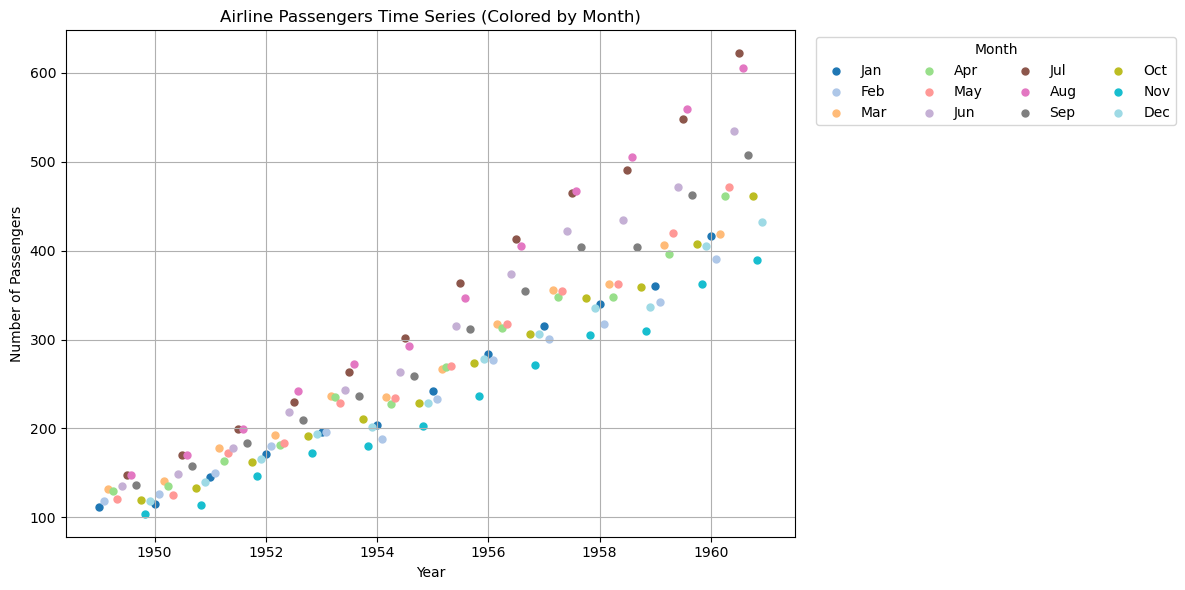

Saved figure to /Users/lihong/Desktop/ATS_proj1/result_images/airpassengers_colored_by_month.png


In [126]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

# set the output folder
save_dir = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(save_dir, exist_ok=True)

# read data 
data = pd.read_csv("AirPassengers.csv")

# ==== 把小数年份转换成年月 ====
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:   # 避免取到13月
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

data["Date"] = data["Time"].apply(year_fraction_to_datetime)
data["Month"] = data["Date"].dt.month

# ==== 为每个月指定颜色 ====
colors = plt.cm.tab20(np.linspace(0, 1, 12))  # 12 个颜色
month_names = list(calendar.month_abbr)[1:]   # ['Jan','Feb',...,'Dec']

# ==== 绘制图形 ====
plt.figure(figsize=(12,6))
for m in range(1, 13):
    subset = data[data["Month"] == m]
    plt.scatter(subset["Date"], subset["AirPassengers"], 
                color=colors[m-1], label=month_names[m-1], s=25)

plt.title("Airline Passengers Time Series (Colored by Month)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.legend(title="Month", ncol=4, bbox_to_anchor=(1.02, 1.0), loc="upper left")

# save figure
save_path = os.path.join(save_dir, "airpassengers_colored_by_month.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved figure to {save_path}")



Question 1-1 

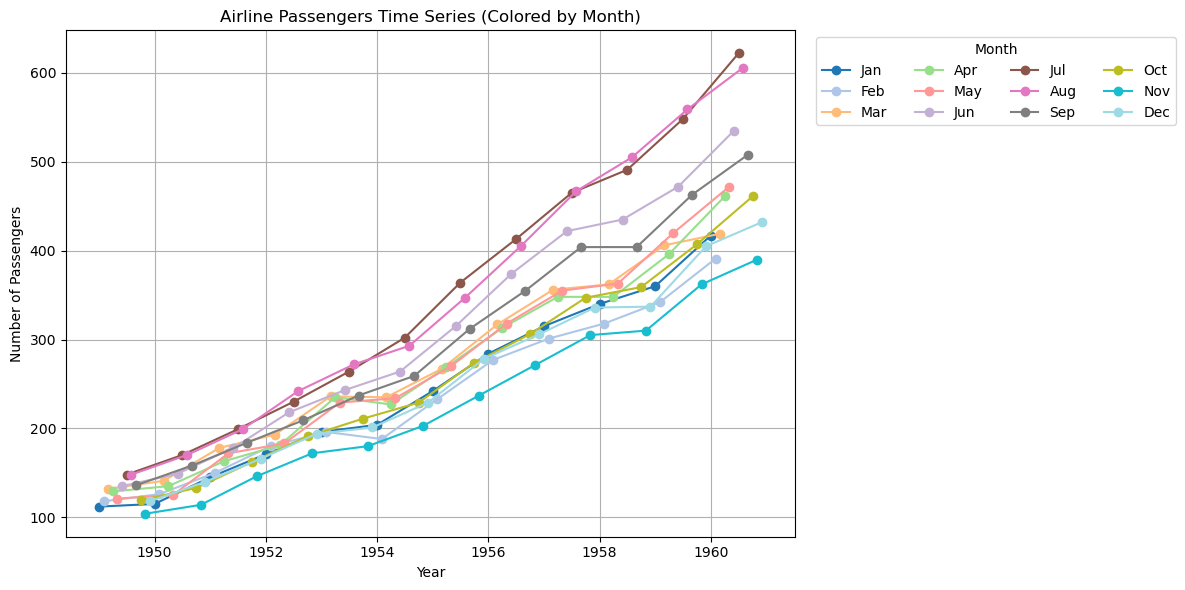

Saved figure to /Users/lihong/Desktop/ATS_proj1/result_images/airpassengers_colored_by_month_line.png


In [127]:


# set the output folder
save_dir = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(save_dir, exist_ok=True)

# read data 
data = pd.read_csv("AirPassengers.csv")

# transit year_float to datetime month
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:   # 避免 13 月
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

data["Date"] = data["Time"].apply(year_fraction_to_datetime)
data["Month"] = data["Date"].dt.month

# ==== 为每个月指定颜色 ====
colors = plt.cm.tab20(np.linspace(0, 1, 12))
month_names = list(calendar.month_abbr)[1:]

# ==== 绘制线条（每个点连起来） ====
plt.figure(figsize=(12,6))
for m in range(1, 13):
    subset = data[data["Month"] == m]
    plt.plot(subset["Date"], subset["AirPassengers"], 
             marker="o", color=colors[m-1], label=month_names[m-1])

plt.title("Airline Passengers Time Series (Colored by Month)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.legend(title="Month", ncol=4, bbox_to_anchor=(1.02, 1.0), loc="upper left")

# save figure
save_path = os.path.join(save_dir, "airpassengers_colored_by_month_line.png")
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved figure to {save_path}")



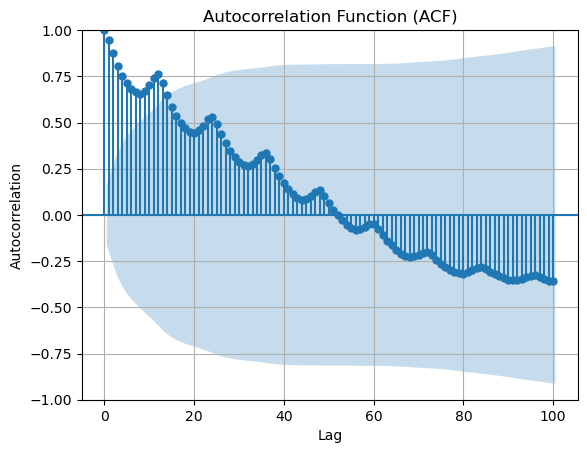

<Figure size 640x480 with 0 Axes>

In [128]:
##ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['AirPassengers'], lags=100)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.savefig(os.path.join(save_dir, "airpassengers_acf.png"), dpi=300, bbox_inches="tight")
plt.show()

##save ACF plot
save_path = os.path.join(save_dir, "airpassengers_acf.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")


In [129]:
##save ACF plot
save_path = os.path.join(save_dir, "airpassengers_acf.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [130]:
from statsmodels.tsa.stattools import adfuller

# calculate ADF test
adf_test = adfuller(data['AirPassengers'])

# print ADF test results
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")
print(f"Number of Lags: {adf_test[2]}")
print(f"Number of Observations Used: {adf_test[3]}")

ADF Statistic: 0.8153688792060523
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Number of Lags: 13
Number of Observations Used: 130


task 1-2: obsrevation of notable trend

In [131]:
## necessary libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

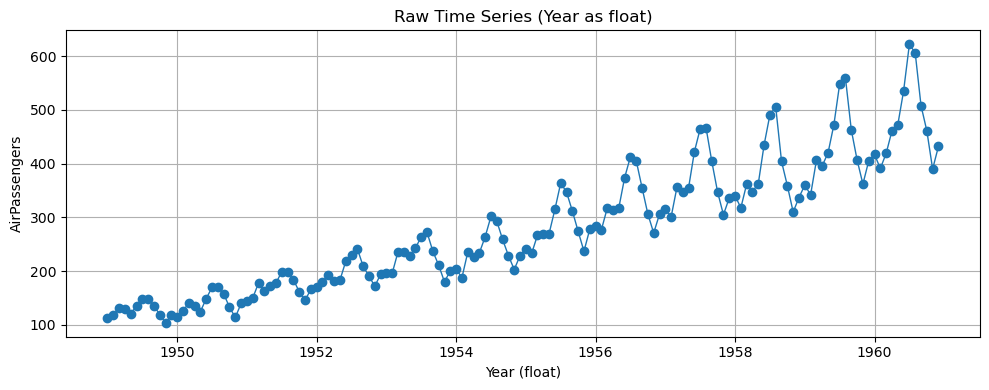

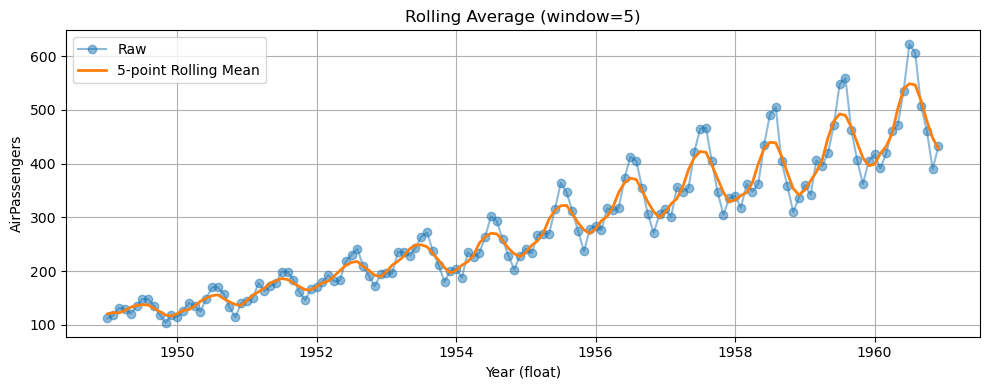

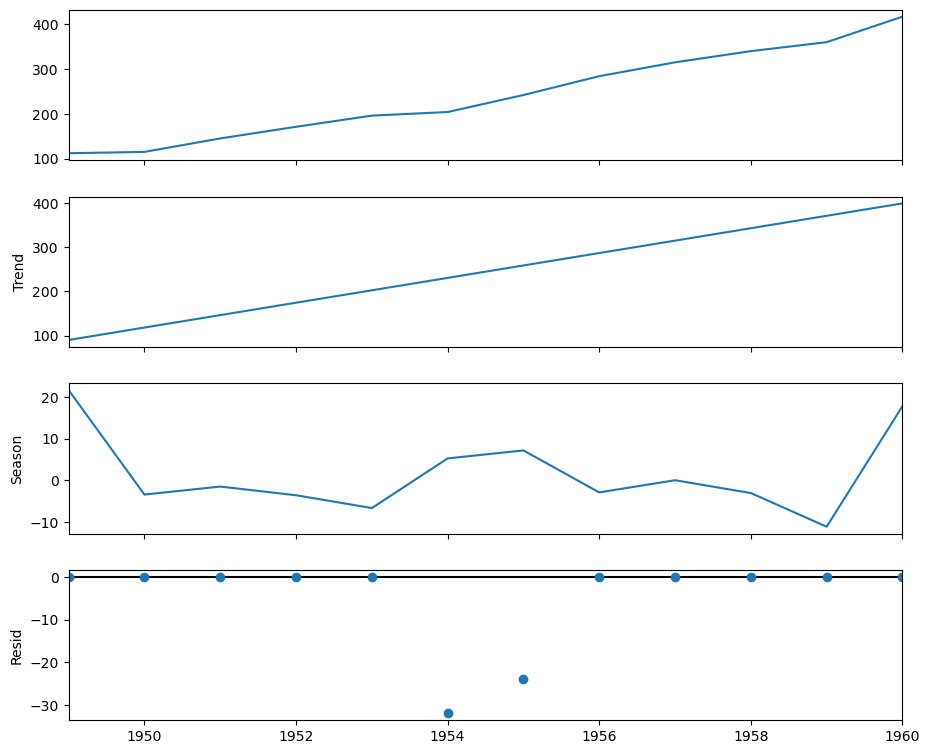

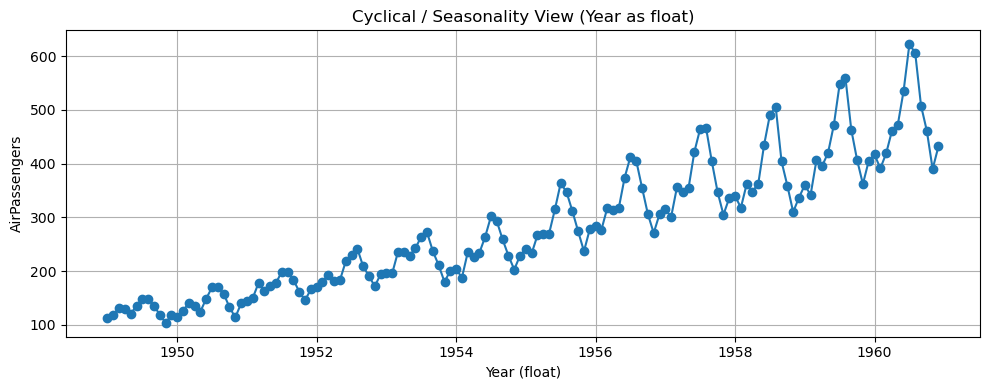

<Figure size 800x400 with 0 Axes>

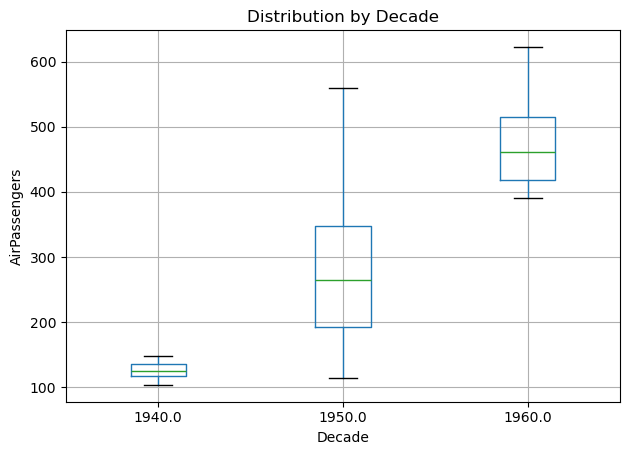

In [132]:


# ==== 路径 ====
CSV_PATH = "/Users/lihong/Desktop/ATS_proj1/AirPassengers.csv"
SAVE_DIR = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(SAVE_DIR, exist_ok=True)

# ==== 读取数据 ====
df = pd.read_csv(CSV_PATH)
date_col = "Year" if "Year" in df.columns else df.columns[0]
value_col = [c for c in df.columns if c != date_col][0]

# 保持年份为浮点数
df[date_col] = df[date_col].astype(str).str.strip().str.replace(",", "")
df[date_col] = df[date_col].astype(float)

# 排序 & 去重（同一年份取均值）
df = df.sort_values(date_col)
df = df.groupby(date_col, as_index=False)[value_col].mean()

years = df[date_col].values
values = df[value_col].values

# ---------------- (1) 原始曲线 ----------------
plt.figure(figsize=(10,4))
plt.plot(years, values, marker="o", linewidth=1)
plt.title("Raw Time Series (Year as float)")
plt.xlabel("Year (float)")
plt.ylabel(value_col)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "01_raw_series.png"), dpi=300)
plt.show()

# ---------------- (2) 滚动平均 ----------------
window = 5
rolling_vals = pd.Series(values).rolling(window=window, min_periods=1, center=True).mean()

plt.figure(figsize=(10,4))
plt.plot(years, values, alpha=0.5, label="Raw", marker="o")
plt.plot(years, rolling_vals, label=f"{window}-point Rolling Mean", linewidth=2)
plt.title(f"Rolling Average (window={window})")
plt.xlabel("Year (float)")
plt.ylabel(value_col)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "02_rolling_average.png"), dpi=300)
plt.show()

# ---------------- (3) STL 分解 ----------------
# 构造等间隔序列（取整数年份为索引，插值）
int_years = np.arange(int(years.min()), int(years.max())+1)
interp_values = np.interp(int_years, years, values)
ts = pd.Series(interp_values, index=pd.Index(pd.to_datetime(int_years, format="%Y")))

stl = STL(ts, period=5, robust=True)  # 周期可调，这里假设5年
res = stl.fit()
fig = res.plot()
fig.set_size_inches(10,8)
fig.savefig(os.path.join(SAVE_DIR, "03_stl_decomposition.png"), dpi=300)
plt.show()

# ---------------- (4) Seasonality view ----------------

plt.figure(figsize=(10,4))
plt.plot(df[date_col], df[value_col], marker="o")
plt.title("Cyclical / Seasonality View (Year as float)")
plt.xlabel("Year (float)")
plt.ylabel(value_col)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "04a_cycle_by_year.png"), dpi=300)
plt.show()

# 还可以按“十年分组”做箱线图，看看 decade pattern
df["Decade"] = (df[date_col] // 10) * 10
plt.figure(figsize=(8,4))
df.boxplot(column=value_col, by="Decade")
plt.suptitle("")
plt.title("Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel(value_col)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "04b_boxplot_decade.png"), dpi=300)
plt.show()




ACF lags = 11, PACF lags = 5 (n = 12)


<Figure size 1000x400 with 0 Axes>

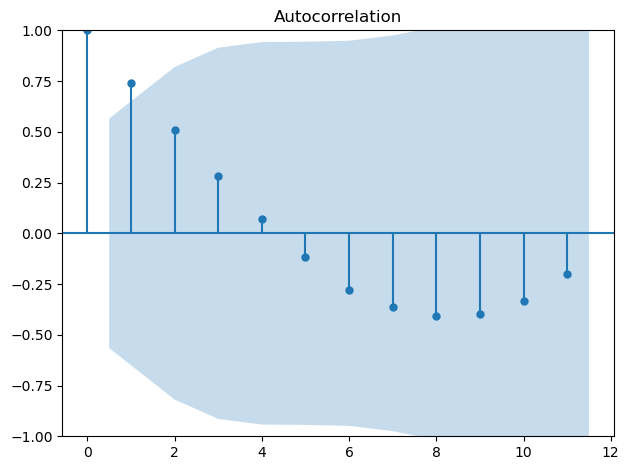

<Figure size 1000x400 with 0 Axes>

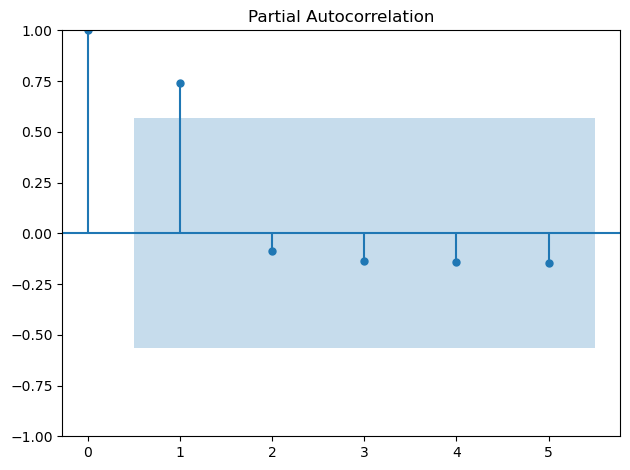

In [133]:
# ---------------- (5) ACF & PACF ----------------
x = ts.dropna()
n = len(x)
if n <= 2:
    raise ValueError(f"样本点太少（n={n}），无法计算 ACF/PACF。")

# ACF: 不超过 n-1，至少为 1
max_lags_acf = max(1, min(20, n - 1))

# PACF: 必须严格 < n/2；保守取 n//2 - 1，且至少为 1
max_lags_pacf = max(1, min(20, (n // 2) - 1))

print(f"ACF lags = {max_lags_acf}, PACF lags = {max_lags_pacf} (n = {n})")

# ACF
plt.figure(figsize=(10,4))
plot_acf(x, lags=max_lags_acf)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "05_acf.png"), dpi=300, bbox_inches="tight")
plt.show()

# PACF
plt.figure(figsize=(10,4))
plot_pacf(x, lags=max_lags_pacf, method="ywm")  # 或 "ywmle"
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "06_pacf.png"), dpi=300, bbox_inches="tight")
plt.show()


1-3  Are there any cyclical behaviors?

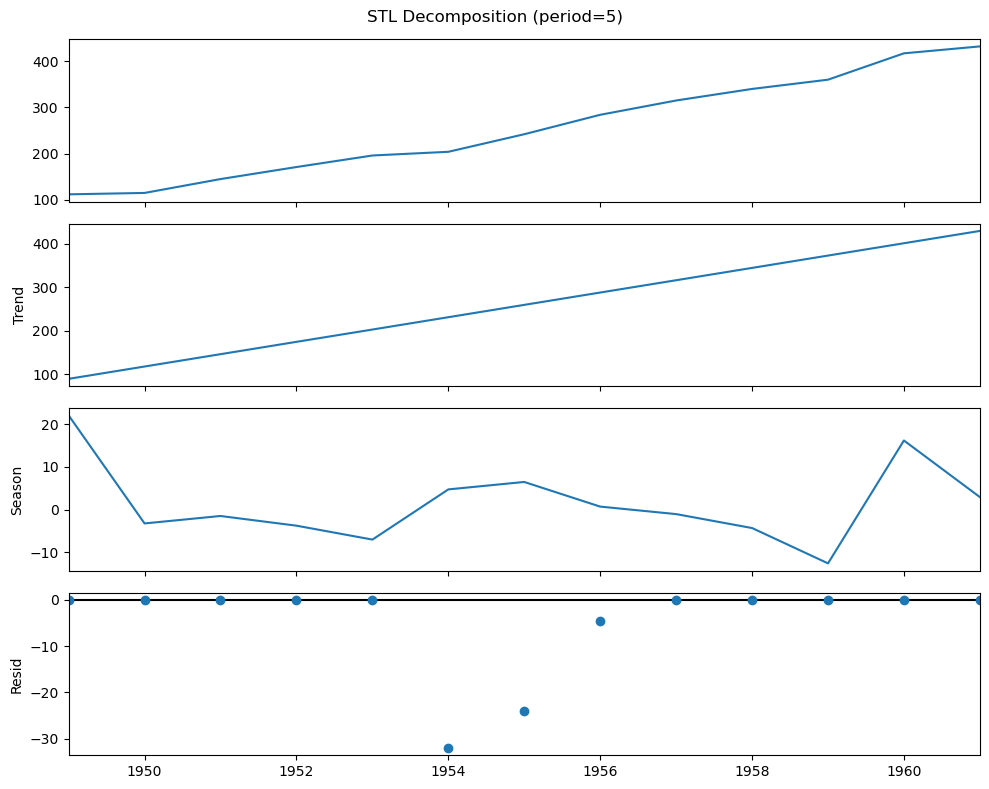

Classical decomposition failed: name 'seasonal_decompose' is not defined
Figures saved to: /Users/lihong/Desktop/ATS_proj1/result_images


In [134]:

# --------- config ---------
CSV_PATH = "/Users/lihong/Desktop/ATS_proj1/AirPassengers.csv"  # 改成你的路径
SAVE_DIR = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(SAVE_DIR, exist_ok=True)

# --------- load ----------
df = pd.read_csv(CSV_PATH)
# 识别列：优先 Month / Year，否则用第一列当日期列
date_col = "Month" if "Month" in df.columns else ("Year" if "Year" in df.columns else df.columns[0])
value_col = [c for c in df.columns if c != date_col][0]

# --------- parse datetime ----------
if date_col.lower() == "month":
    # 常见 AirPassengers: YYYY-MM
    df[date_col] = pd.to_datetime(df[date_col], errors="raise")
    ts = df.set_index(date_col)[value_col].astype(float).asfreq("MS")  # 月度
    period = 12
else:
    # 只有 Year：可能是 1949 或 1949.5 之类
    yr = df[date_col].astype(str).str.strip().str.replace(",", "")
    # 尝试 float
    yr_f = yr.astype(float)

    # 如果几乎全是整数年：按年度序列处理
    if np.allclose(yr_f, np.round(yr_f)):
        years = np.round(yr_f).astype(int)
        idx = pd.to_datetime(years, format="%Y")
        ts = pd.Series(df[value_col].astype(float).values, index=idx).sort_index()
        ts = ts.groupby(ts.index).mean()          # 去重聚合
        ts = ts.asfreq("YS")                      # 年度频率
        period = 5                                # 你可以改成 5、10等
    else:
        # 带小数年份：用线性插值映射到整数年，供分解用
        years_float = yr_f.values
        values = df[value_col].astype(float).values
        int_years = np.arange(int(np.floor(years_float.min())), int(np.ceil(years_float.max())) + 1)
        interp_values = np.interp(int_years, years_float, values)
        idx = pd.to_datetime(int_years, format="%Y")
        ts = pd.Series(interp_values, index=idx).asfreq("YS")
        period = 5  # 你可以改

# ---------- STL ----------
stl = STL(ts, period=period, robust=True)
res = stl.fit()

fig = res.plot()
fig.set_size_inches(10, 8)
fig.suptitle(f"STL Decomposition (period={period})", y=0.98)
fig.tight_layout()
fig.savefig(os.path.join(SAVE_DIR, "stl_decomposition.png"), dpi=300, bbox_inches="tight")
plt.show()

# ---------- Classical decomposition（可选） ----------
# model="additive" 适合幅度大致恒定的季节性；幅度随水平变化时可用 "multiplicative"
try:
    classical = seasonal_decompose(ts, period=period, model="additive")  # 或 "multiplicative"
    fig2 = classical.plot()
    fig2.set_size_inches(10, 8)
    fig2.suptitle(f"Classical Decomposition (period={period}, additive)", y=0.98)
    fig2.tight_layout()
    fig2.savefig(os.path.join(SAVE_DIR, "classical_decomposition.png"), dpi=300, bbox_inches="tight")
    plt.show()
except Exception as e:
    print("Classical decomposition failed:", e)

print(f"Figures saved to: {SAVE_DIR}")

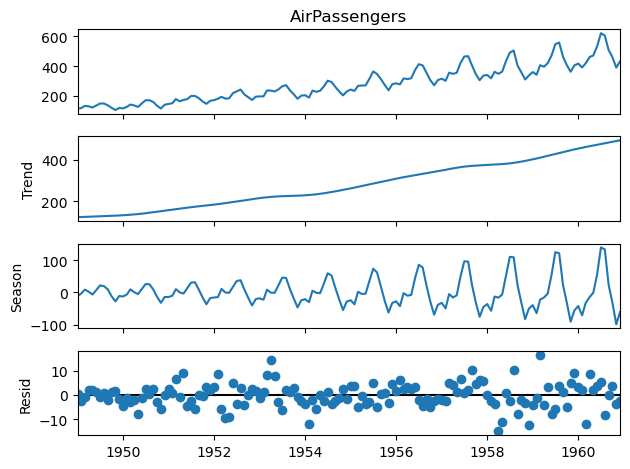

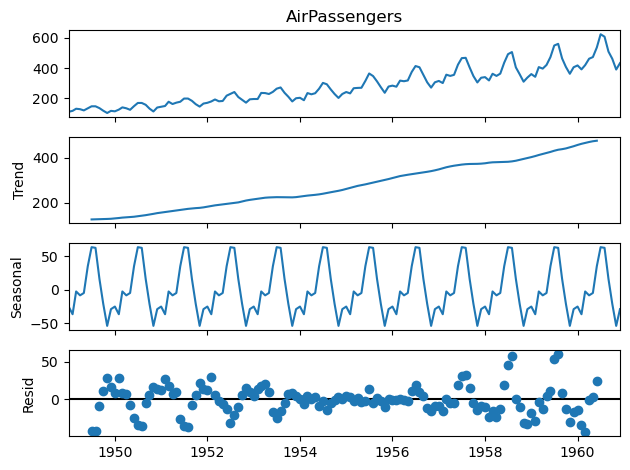

In [138]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
df = pd.read_csv("AirPassengers.csv")

# 小数年份 -> datetime
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

# 使用 STL 分解
stl = STL(ts, period=12)
res = stl.fit()
res.plot()
plt.show()

# Classical decomposition
decomp = seasonal_decompose(ts, period=12, model="additive")
decomp.plot()
plt.show()

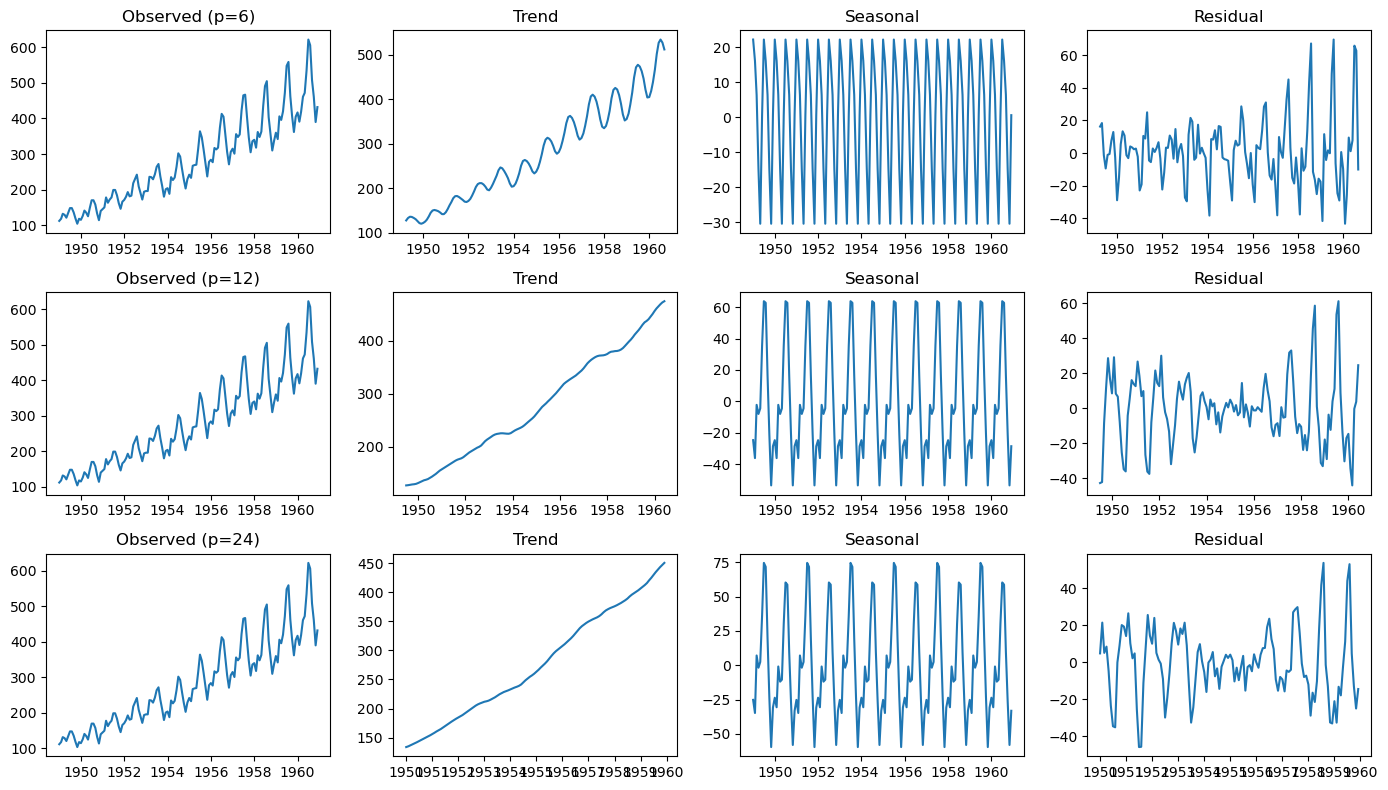

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ==== 读取数据 ====
df = pd.read_csv("AirPassengers.csv")

# 小数年份转 datetime
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

# ==== 分解对比 ====
periods = [6, 12, 24]
fig, axes = plt.subplots(len(periods), 4, figsize=(14, 8))

for i, p in enumerate(periods):
    result = seasonal_decompose(ts, model="additive", period=p)
    axes[i,0].plot(result.observed); axes[i,0].set_title(f"Observed (p={p})")
    axes[i,1].plot(result.trend);    axes[i,1].set_title("Trend")
    axes[i,2].plot(result.seasonal); axes[i,2].set_title("Seasonal")
    axes[i,3].plot(result.resid);    axes[i,3].set_title("Residual")

plt.tight_layout()
plt.show()


1-4 Are there any heteroscedasticity? 

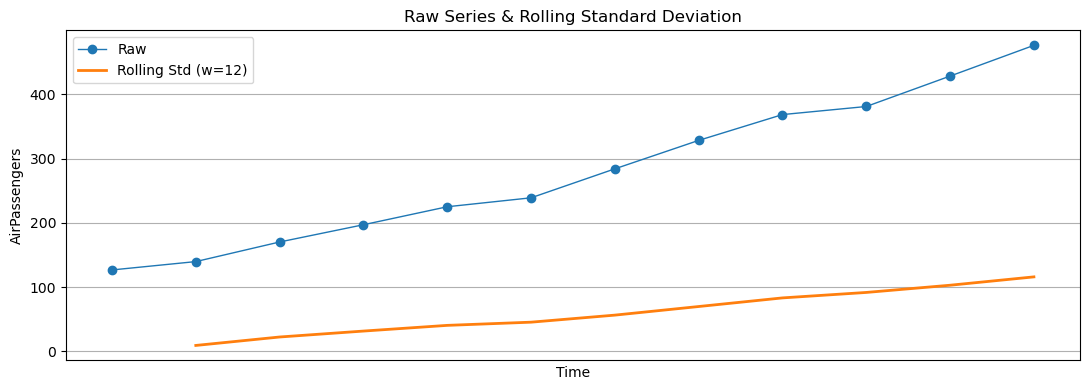

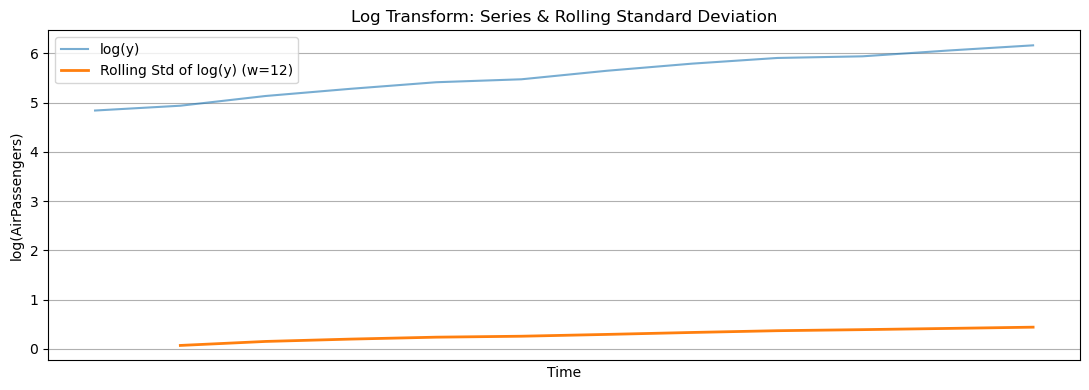

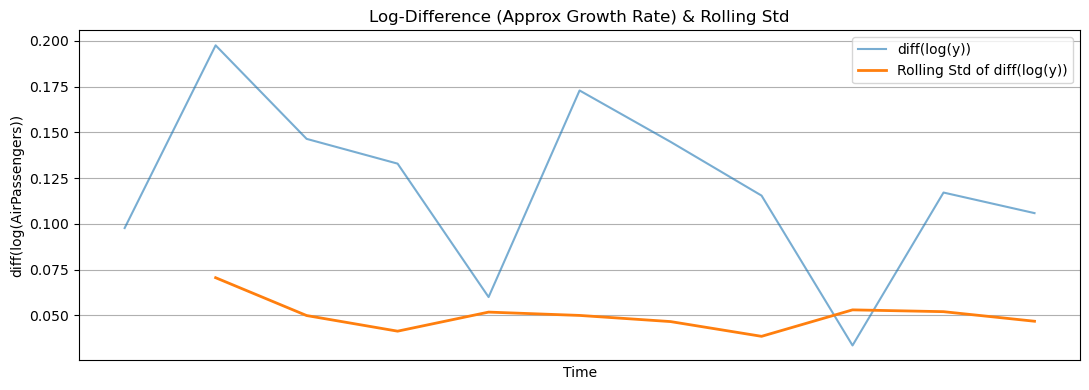


=== Engle ARCH Test (heteroskedasticity) ===
[ARCH test] raw y: stat=6.9921, p-value=0.2212
[ARCH test] log(y): stat=6.9883, p-value=0.2215
[ARCH test] diff(log(y)): stat=6.0000, p-value=0.3062

Interpretation tips:
- Small p-value (e.g., < 0.05) suggests heteroskedasticity (reject homoskedastic null).
- Typically, AirPassengers-like data shows stronger heteroskedasticity in raw y,
  which is reduced after log transform, and further reduced in diff(log(y)).

All figures saved to: /Users/lihong/Desktop/ATS_proj1/result_images


/var/folders/nn/nngvs1yd69j6549rddtmff040000gn/T/ipykernel_15511/3205602654.py:109: FutureWarning: the 'maxlag' keyword is deprecated, use 'nlags' instead.
  stat, pval, lags, crit = het_arch(arr, maxlag=5)  # 你可以改 maxlag


In [141]:

# ==== Heteroscedasticity check: visual + ARCH test ====
# Requirements: pandas, numpy, matplotlib, statsmodels
# conda/pip: conda install pandas numpy matplotlib statsmodels

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch

# --------- config ---------
CSV_PATH = "/Users/lihong/Desktop/ATS_proj1/AirPassengers.csv"  # 改成你的路径
SAVE_DIR = "/Users/lihong/Desktop/ATS_proj1/result_images"
os.makedirs(SAVE_DIR, exist_ok=True)

# --------- load ----------
df = pd.read_csv(CSV_PATH)

# 识别列：优先 Month / Year，否则用第一列当时间列
date_col = "Month" if "Month" in df.columns else ("Year" if "Year" in df.columns else df.columns[0])
value_col = [c for c in df.columns if c != date_col][0]

# --------- build series without forcing equal spacing ----------
# 尝试解析 Month（YYYY-MM 或可解析字符串）
def try_parse_datetime(s):
    try:
        return pd.to_datetime(s, errors="raise")
    except Exception:
        return None

x_time = try_parse_datetime(df[date_col])
if isinstance(x_time, pd.Series) and not x_time.isna().all():
    # 有可解析的 datetime，就用它当索引
    s = pd.Series(df[value_col].astype(float).values, index=x_time)
    # 去重（同一时间点多条 → 平均；你也可换成 .sum()）
    s = s.groupby(s.index).mean().sort_index()
else:
    # 只用 Year（整年或小数年）作为横轴，不强制转日期
    years = df[date_col].astype(str).str.strip().str.replace(",", "")
    s = pd.Series(df[value_col].astype(float).values,
                  index=years.astype(float)).sort_index()
    # 同一年（或同一小数年）多条 → 平均
    s = s.groupby(s.index).mean()

# 判断窗口：月度常用 12；年度/非等间隔用 5
rolling_window = 12 if isinstance(s.index, pd.DatetimeIndex) else 5

# --------- 1) 原序列 + 滚动标准差（可视化异方差） ----------
roll_std = pd.Series(s.values).rolling(window=rolling_window, min_periods=1).std()

plt.figure(figsize=(11,4))
if isinstance(s.index, pd.DatetimeIndex):
    plt.plot(s.index, s.values, marker="o", linewidth=1, label="Raw")
    plt.plot(s.index, roll_std.values, linewidth=2, label=f"Rolling Std (w={rolling_window})")
    plt.xlabel("Time")
else:
    plt.plot(s.index.values, s.values, marker="o", linewidth=1, label="Raw")
    plt.plot(s.index.values, roll_std.values, linewidth=2, label=f"Rolling Std (w={rolling_window})")
    plt.xlabel("Year (float)")
plt.title("Raw Series & Rolling Standard Deviation")
plt.ylabel(value_col)
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "hetero_01_raw_rolling_std.png"), dpi=300, bbox_inches="tight")
plt.show()

# --------- 2) 对数变换及其滚动标准差 ----------
# 避免 log(0)：加一个很小的常数
eps = 1e-9
s_log = np.log(s + eps)
roll_std_log = pd.Series(s_log.values).rolling(window=rolling_window, min_periods=1).std()

plt.figure(figsize=(11,4))
if isinstance(s.index, pd.DatetimeIndex):
    plt.plot(s.index, s_log.values, alpha=0.6, label="log(y)")
    plt.plot(s.index, roll_std_log.values, linewidth=2, label=f"Rolling Std of log(y) (w={rolling_window})")
    plt.xlabel("Time")
else:
    plt.plot(s.index.values, s_log.values, alpha=0.6, label="log(y)")
    plt.plot(s.index.values, roll_std_log.values, linewidth=2, label=f"Rolling Std of log(y) (w={rolling_window})")
    plt.xlabel("Year (float)")
plt.title("Log Transform: Series & Rolling Standard Deviation")
plt.ylabel("log("+value_col+")")
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "hetero_02_log_rolling_std.png"), dpi=300, bbox_inches="tight")
plt.show()

# --------- 3) log 差分（增长率近似）及其滚动标准差 ----------
s_logdiff = s_log.diff().dropna()
roll_std_logdiff = pd.Series(s_logdiff.values).rolling(window=max(3, rolling_window//2), min_periods=1).std()

plt.figure(figsize=(11,4))
x_axis = s_logdiff.index if isinstance(s.index, pd.DatetimeIndex) else s_logdiff.index.values
plt.plot(x_axis, s_logdiff.values, alpha=0.6, label="diff(log(y))")
plt.plot(x_axis, roll_std_logdiff.values, linewidth=2, label="Rolling Std of diff(log(y))")
plt.title("Log-Difference (Approx Growth Rate) & Rolling Std")
plt.xlabel("Time" if isinstance(s.index, pd.DatetimeIndex) else "Year (float)")
plt.ylabel("diff(log("+value_col+"))")
plt.grid(True); plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "hetero_03_logdiff_rolling_std.png"), dpi=300, bbox_inches="tight")
plt.show()

# --------- 4) ARCH test（统计检验） ----------
def arch_test_report(arr, name):
    arr = pd.Series(arr).dropna().values
    # het_arch 通常用于残差或收益率；这里我们在三种表示上做一个横向对比
    stat, pval, lags, crit = het_arch(arr, maxlag=5)  # 你可以改 maxlag
    print(f"[ARCH test] {name}: stat={stat:.4f}, p-value={pval:.4f}")
    return stat, pval

print("\n=== Engle ARCH Test (heteroskedasticity) ===")
arch_raw = arch_test_report(s.values, "raw y")
arch_log = arch_test_report(s_log.values, "log(y)")
arch_logdiff = arch_test_report(s_logdiff.values, "diff(log(y))")

print("\nInterpretation tips:")
print("- Small p-value (e.g., < 0.05) suggests heteroskedasticity (reject homoskedastic null).")
print("- Typically, AirPassengers-like data shows stronger heteroskedasticity in raw y,")
print("  which is reduced after log transform, and further reduced in diff(log(y)).")

print(f"\nAll figures saved to: {SAVE_DIR}")
